In [133]:
#LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics
from lightgbm import LGBMClassifier
import xgboost
from catboost import CatBoostClassifier
from sklearn.linear_model import RidgeClassifier

In [134]:
%%time
master=pd.read_csv('D:/R/Banking subscription/bank.csv',sep=';')
master.rename(columns={'y':'target'},inplace=True)
print(master.shape)
master.head()

(41188, 21)
Wall time: 172 ms


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [135]:
#CHECK DTYPES#
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [136]:
master.isnull().sum()/len(master)*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
target            0.0
dtype: float64

# SEPERATION#

In [137]:
## SEPEARTION CATEGORY VS NUMERIC

continuous = []
ct = []

for i in master.columns:
    if master[i].dtype == "object":
        ct.append(i)
    else: continuous.append(i)

print("Continuous:", continuous)
print("-")
print("Categorical:", ct)

Continuous: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
-
Categorical: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'target']


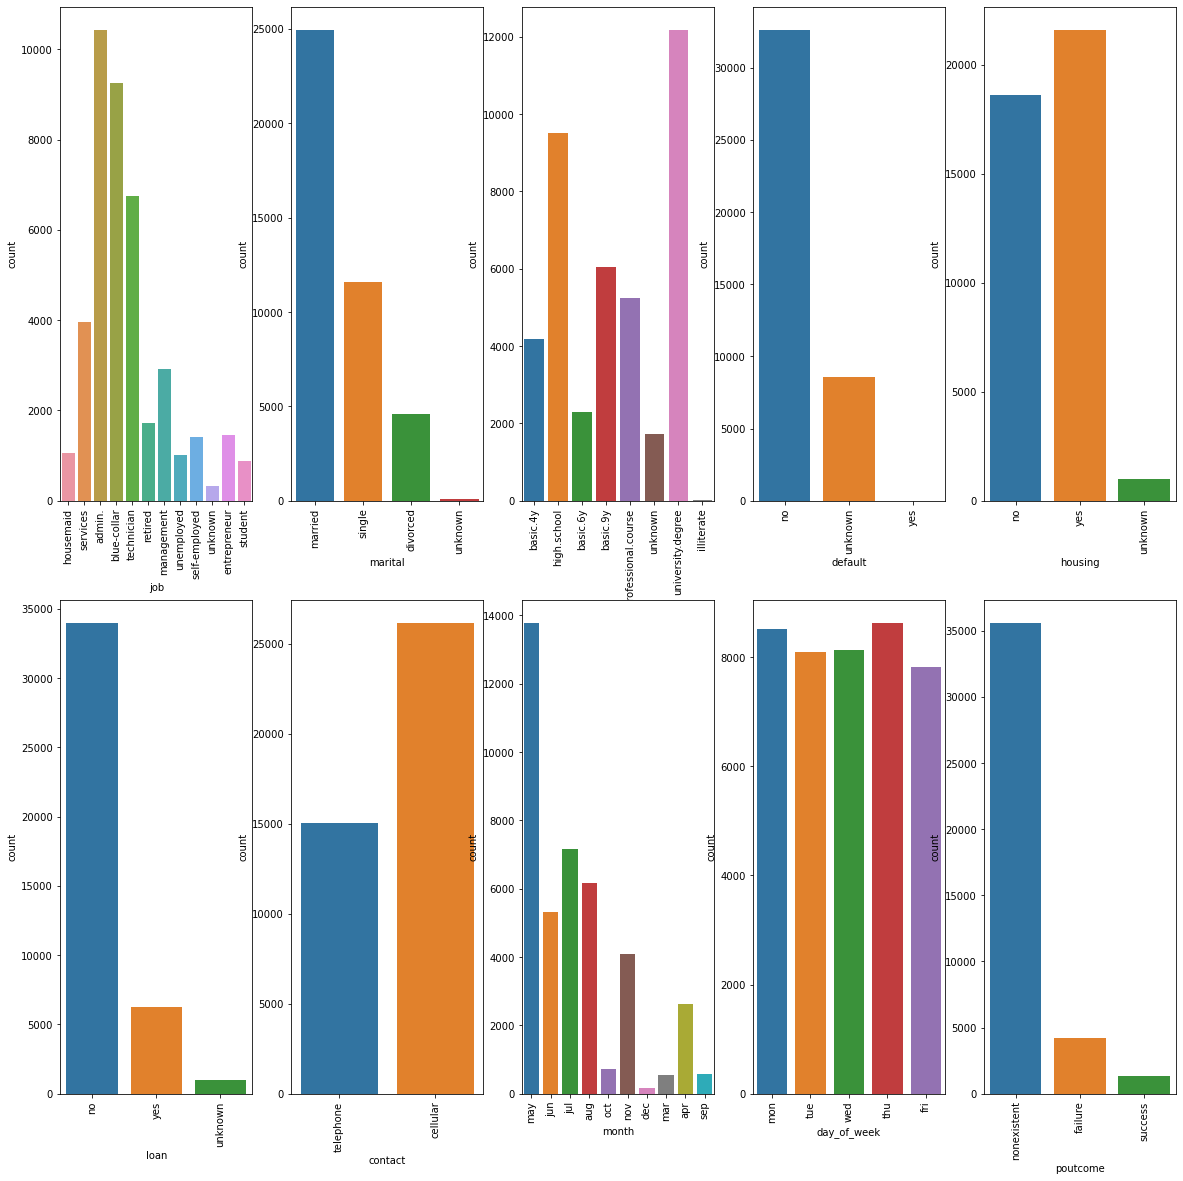

In [138]:
fig,ax=plt.subplots(2,5,figsize=(20,20))
for i,subplot in zip(ct,ax.flatten()):
    sns.countplot(master[i],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

IndexError: index 5 is out of bounds for axis 0 with size 5

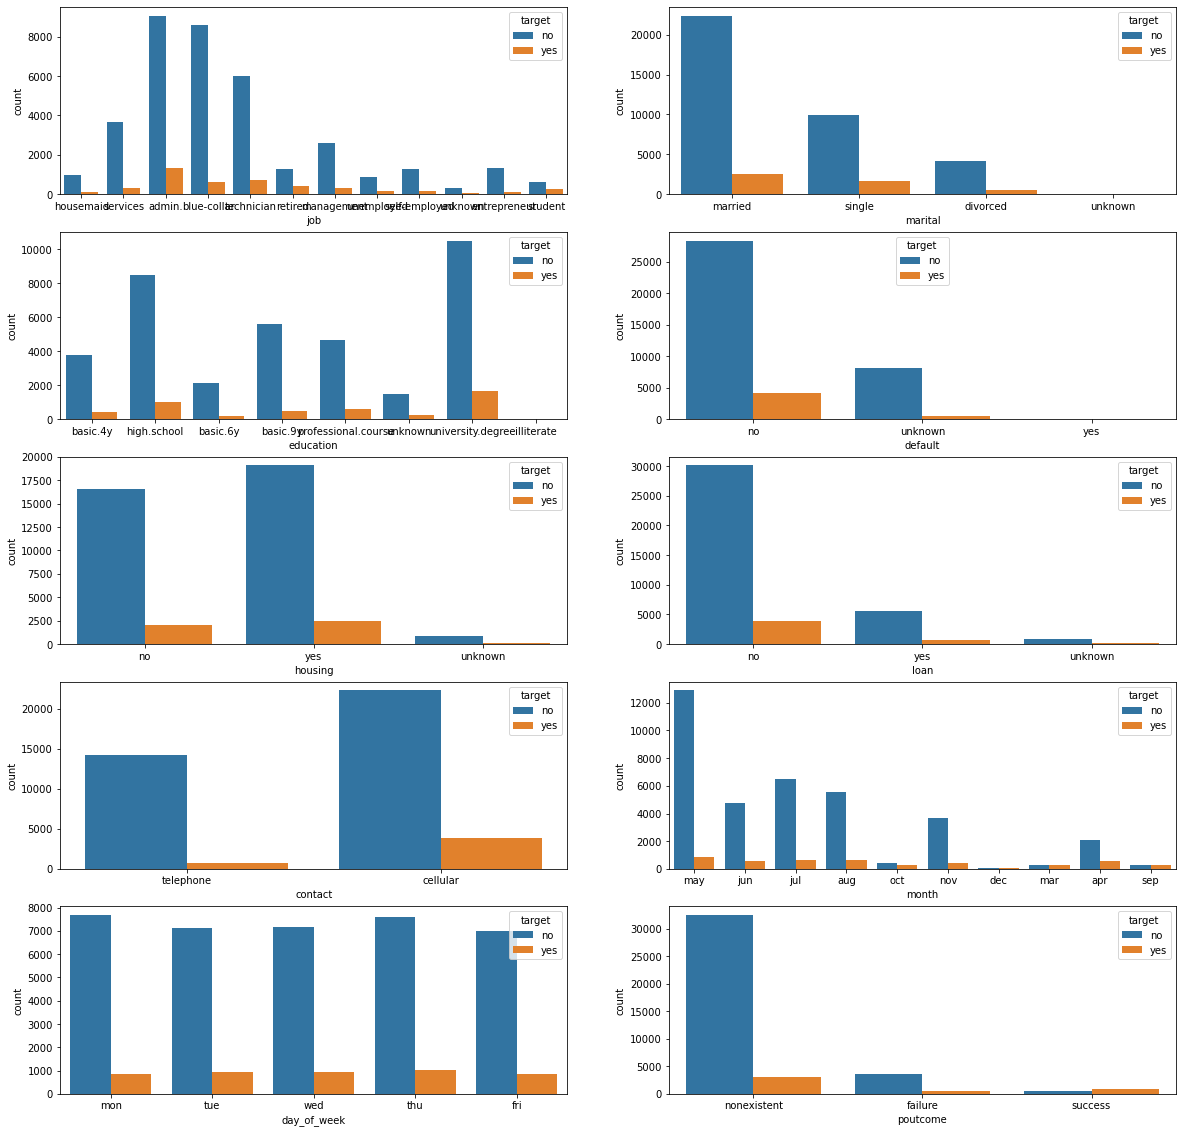

In [139]:
fig,axes = plt.subplots(5,2,figsize=(20,20))
for idx,cat_col in enumerate(ct):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=master,hue='target',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

# FLORRING & CAPPING OF OUTLIERS##


In [ ]:

master.age.iloc[master.age > 71.0]=71.0
master['cons.price.idx'].iloc[master['cons.price.idx'] > 94.465]=94.465

# UNIVARIATE#

In [ ]:
#Numerical
dd={'age','emp.var.rate','cons.price.idx','cons.conf.idx','nr.employed'}
fig, ax=plt.subplots(2,3,figsize=(10,10))
for variable,subplot in zip(dd,ax.flatten()):
    sns.distplot(master[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# LABEL ENCODING#

In [ ]:
le=LabelEncoder()
for i in ct:
    master[i]=le.fit_transform(master[i])
    

In [ ]:
#FEATURE ENGINEERING#
master['after_campaign']=  master['previous'] / master['campaign']
master['dur_camp']= master['duration'] - master['campaign']
master['pregh']=  master['poutcome'] / master['previous']

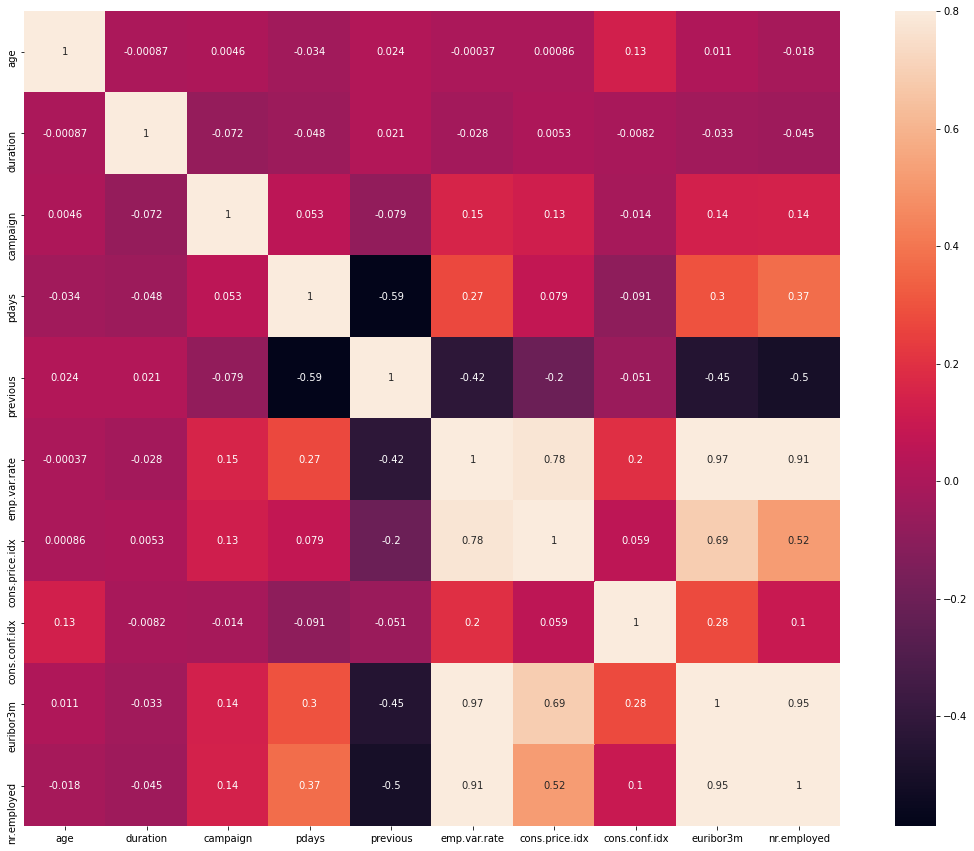

In [140]:
#correlation matrix
corrmat = master.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrmat, vmax=.8,annot = True,square=True);

# TARGET VARIABLE BEFORE TRANSFORMATION#

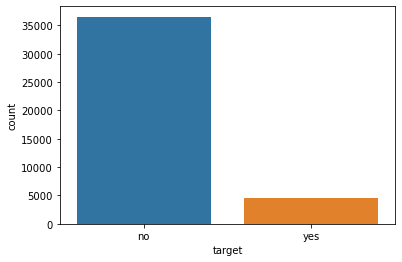

In [141]:
sns.countplot(master.target)

# MODEL BUILDING#

In [142]:
#SEPEARATION#
gf={'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'}
master=pd.get_dummies(master,columns=gf)
X=master.drop(['target'],axis=1)
y=master['target']

###########SMOTE############3
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [144]:
le=LabelEncoder()
y=le.fit_transform(y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
########SPLITTING#####
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


# TARGET VARIABLE AFTER TRANSFORMATION#

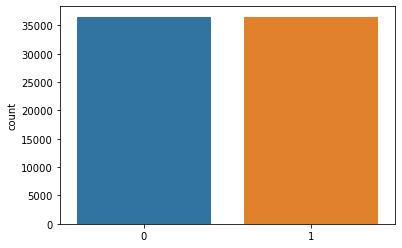

In [146]:
sns.countplot(y)

# BEST MODEL SELECTION CRITERIA#

In [145]:
import sklearn.ensemble as ensemble
from catboost import CatBoostClassifier

lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)
xgb=xgboost.XGBClassifier()
cat=CatBoostClassifier()

# ,ab_rf,ab_dt,ab_nb,ab_lr,bgcl_lr

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr,xgb,cat]
sctr,scte,auc,ps,rs=[],[],[],[],[]
def ens(x_train,x_val, y_train, y_val):
    for model in models:
            model.fit(x_train, y_train)
            y_test_pred = model.predict(x_val)
            y_test_pred_new=model.predict_proba(x_val)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(x_train,y_train)
            test_score=model.score(x_val,y_val)
            p_score=metrics.precision_score(y_val,y_test_pred)
            r_score=metrics.recall_score(y_val,y_test_pred)
            
            ac=metrics.roc_auc_score(y_val,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
    return sctr,scte,auc,ps,rs
ens(x_train,x_val, y_train, y_val)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR','XgBoost','CatBoost'],
                       'auc_score':auc,'training':sctr,'validation':scte,'precision':ps,'recall':rs})
ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
ensemble

Learning rate set to 0.052988
0:	learn: 0.6362909	total: 83.6ms	remaining: 1m 23s
1:	learn: 0.5861564	total: 97.2ms	remaining: 48.5s
2:	learn: 0.5448544	total: 111ms	remaining: 36.8s
3:	learn: 0.5029609	total: 151ms	remaining: 37.6s
4:	learn: 0.4718035	total: 165ms	remaining: 32.9s
5:	learn: 0.4470384	total: 194ms	remaining: 32.2s
6:	learn: 0.4263955	total: 213ms	remaining: 30.2s
7:	learn: 0.4011807	total: 230ms	remaining: 28.5s
8:	learn: 0.3839991	total: 243ms	remaining: 26.8s
9:	learn: 0.3571372	total: 257ms	remaining: 25.5s
10:	learn: 0.3425383	total: 270ms	remaining: 24.3s
11:	learn: 0.3281029	total: 285ms	remaining: 23.5s
12:	learn: 0.3033015	total: 298ms	remaining: 22.6s
13:	learn: 0.2943129	total: 310ms	remaining: 21.9s
14:	learn: 0.2850516	total: 322ms	remaining: 21.1s
15:	learn: 0.2753981	total: 334ms	remaining: 20.6s
16:	learn: 0.2695611	total: 347ms	remaining: 20.1s
17:	learn: 0.2647605	total: 366ms	remaining: 20s
18:	learn: 0.2389886	total: 380ms	remaining: 19.6s
19:	learn:

,names,auc_score,training,validation,precision,recall
0,Random Forest,0.992417,1.000000,0.950342,0.957622,0.941816
1,CatBoost,0.992030,0.976879,0.948632,0.955428,0.940578
2,XgBoost,0.990316,0.949056,0.942750,0.935781,0.950069
3,Logistic Regression,0.990309,0.950869,0.946238,0.969039,0.921320
4,bagged LR,0.990307,0.950852,0.946306,0.968908,0.921596
5,Bagging,0.987527,0.997144,0.943365,0.949358,0.936039
6,Ada boost,0.987083,0.943635,0.939672,0.949732,0.927785
7,KNN,0.966431,0.952083,0.935363,0.954971,0.913067
8,Decistion Tree,0.931744,1.000000,0.931737,0.930060,0.932875
9,Naive-Bayes,0.928864,0.837335,0.836662,0.781481,0.932187
